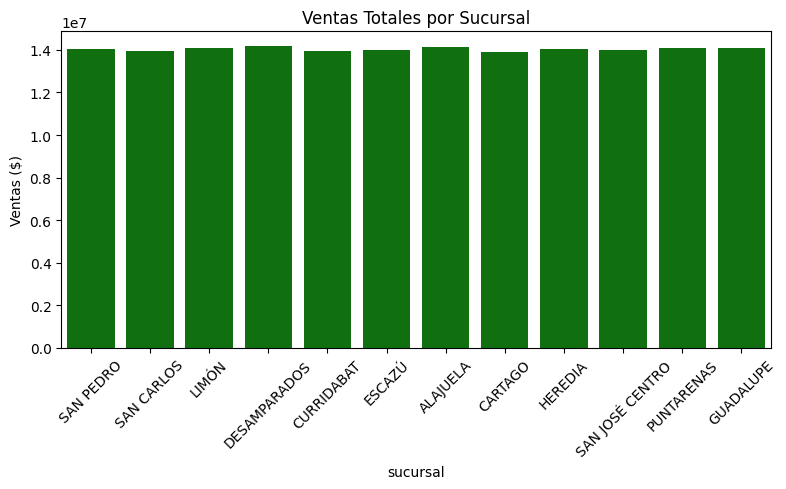

In [0]:
# ============================================================
# Visualización: Ventas Totales por Sucursal
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F

# 1. Lectura de la tabla Gold
# Cargamos la tabla 'df_techmart_gold_ventas_por_sucursal' desde el catálogo.
# Esta tabla contiene las métricas agregadas por sucursal.
df_sucursal = spark.read.table("workspace.default.df_techmart_gold_ventas_por_sucursal")

# 2. Conversión a Pandas
# Convertimos el DataFrame Spark a Pandas para poder graficar con matplotlib/seaborn.
pdf_sucursal = df_sucursal.toPandas()

# 3. Limpieza de formato monetario
# Si la columna 'ventas_totales' está en formato string con símbolo '$',
# la transformamos a tipo numérico (float) para poder graficar correctamente.
if pdf_sucursal["ventas_totales"].dtype == "object":
    pdf_sucursal["ventas_totales"] = pdf_sucursal["ventas_totales"].str.replace("$", "").astype(float)

# 4. Creación del gráfico de barras
plt.figure(figsize=(8,5))
sns.barplot(
    x="sucursal", 
    y="ventas_totales", 
    color="green", 
    data=pdf_sucursal
)
plt.title("Ventas Totales por Sucursal")   # Título del gráfico
plt.ylabel("Ventas ($)")                   # Etiqueta del eje Y
plt.xticks(rotation=45)                    # Rotamos etiquetas del eje X para mejor lectura
plt.tight_layout()                         # Ajustamos el layout para evitar solapamientos
plt.show()                                 # Mostramos el gráfico


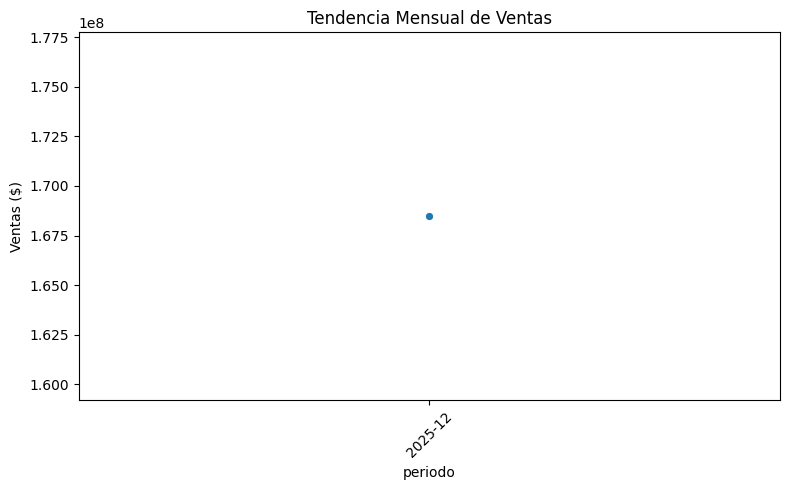

In [0]:
# ============================================================
# Visualización: Tendencia Mensual de Ventas
# ============================================================

# 1. Lectura de la tabla Gold
# Cargamos la tabla 'df_techmart_gold_tendencia_mensual' desde el catálogo.
# Esta tabla contiene las métricas agregadas por año y mes.
df_tendencia = spark.read.table("workspace.default.df_techmart_gold_tendencia_mensual")

# 2. Conversión a Pandas
# Convertimos el DataFrame Spark a Pandas para poder graficar con matplotlib/seaborn.
pdf_tendencia = df_tendencia.toPandas()

# 3. Limpieza de formato monetario
# Si la columna 'ventas_totales' está en formato string con símbolo '$',
# la transformamos a tipo numérico (float) para poder graficar correctamente.
if pdf_tendencia["ventas_totales"].dtype == "object":
    pdf_tendencia["ventas_totales"] = pdf_tendencia["ventas_totales"].str.replace("$", "").astype(float)

# 4. Preparación de columnas de fecha
# Convertimos 'mes' a entero para ordenar correctamente.
pdf_tendencia["mes"] = pdf_tendencia["mes"].astype(int)
# Ordenamos cronológicamente por año y mes.
pdf_tendencia = pdf_tendencia.sort_values(["año", "mes"])
# Creamos una columna 'periodo' con formato "año-mes" para el eje X.
pdf_tendencia["periodo"] = pdf_tendencia["año"].astype(str) + "-" + pdf_tendencia["mes"].astype(str)

# 5. Creación del gráfico de línea
plt.figure(figsize=(8,5))
sns.lineplot(
    x="periodo", 
    y="ventas_totales", 
    data=pdf_tendencia, 
    marker="o"
)
plt.title("Tendencia Mensual de Ventas")   # Título del gráfico
plt.ylabel("Ventas ($)")                   # Etiqueta del eje Y
plt.xticks(rotation=45)                    # Rotamos etiquetas del eje X para mejor lectura
plt.tight_layout()                         # Ajustamos el layout para evitar solapamientos
plt.show()                                 # Mostramos el gráfico

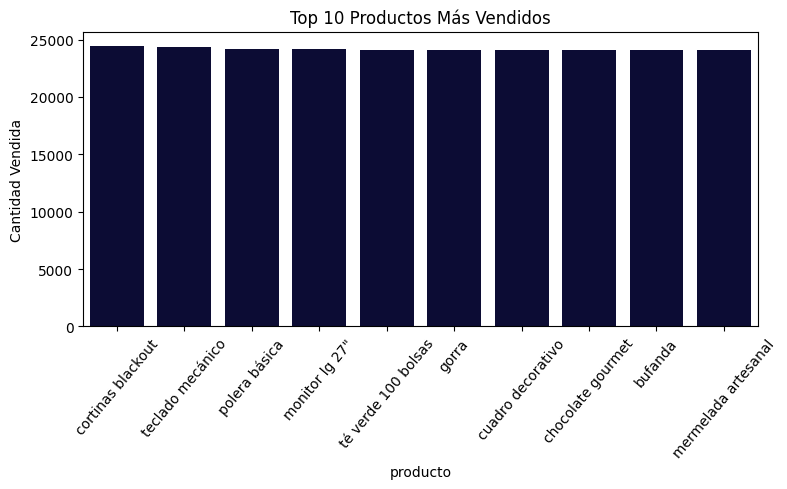

In [0]:
# ============================================================
# Visualización: Top 10 Productos Más Vendidos
# ============================================================

# 1. Lectura de la tabla Gold
# Cargamos la tabla 'df_techmart_gold_top_productos' desde el catálogo.
# Esta tabla contiene los 10 productos con mayor cantidad vendida.
df_top = spark.read.table("workspace.default.df_techmart_gold_top_productos")

# 2. Conversión a Pandas
# Convertimos el DataFrame Spark a Pandas para poder graficar con matplotlib/seaborn.
pdf_top = df_top.toPandas()

# 3. Creación del gráfico de barras
plt.figure(figsize=(8,5))
sns.barplot(
    x="producto", 
    y="cantidad_vendida", 
    color="#05053B",   # Color azul oscuro personalizado
    data=pdf_top
)
plt.title("Top 10 Productos Más Vendidos")   # Título del gráfico
plt.ylabel("Cantidad Vendida")               # Etiqueta del eje Y
plt.xticks(rotation=50)                      # Rotamos etiquetas del eje X para mejor lectura
plt.tight_layout()                           # Ajustamos el layout para evitar solapamientos
plt.show()                                   # Mostramos el gráfico


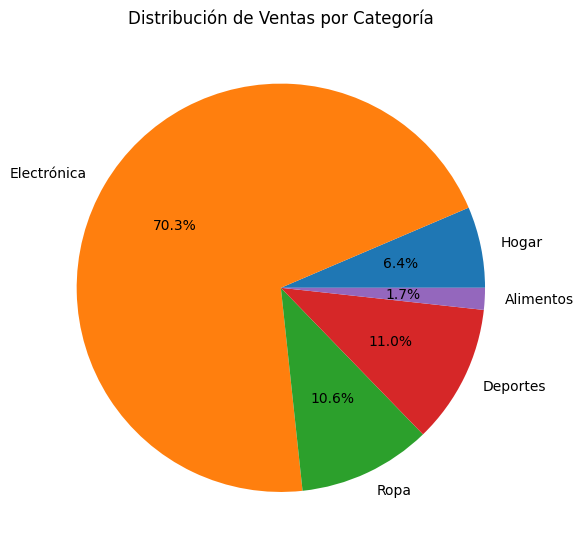

In [0]:
# ============================================================
# Visualización: Distribución de Ventas por Categoría
# ============================================================

# 1. Lectura de la tabla Gold
# Cargamos la tabla 'df_techmart_gold_ventas_por_categoria' desde el catálogo.
# Esta tabla contiene las métricas agregadas por categoría de producto.
df_categoria = spark.read.table("workspace.default.df_techmart_gold_ventas_por_categoria")

# 2. Conversión a Pandas
# Convertimos el DataFrame Spark a Pandas para poder graficar con matplotlib.
pdf_categoria = df_categoria.toPandas()

# 3. Limpieza de formato monetario
# Si la columna 'ventas_totales' está en formato string con símbolo '$',
# la transformamos a tipo numérico (float) para poder graficar correctamente.
if pdf_categoria["ventas_totales"].dtype == "object":
    pdf_categoria["ventas_totales"] = pdf_categoria["ventas_totales"].str.replace("$", "").astype(float)

# 4. Creación del gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(
    pdf_categoria["ventas_totales"], 
    labels=pdf_categoria["categoria"], 
    autopct="%1.1f%%"   # Muestra el porcentaje con un decimal
)
plt.title("Distribución de Ventas por Categoría")   # Título del gráfico
plt.tight_layout()                                 # Ajustamos el layout para evitar solapamientos
plt.show()                                         # Mostramos el gráfico